In [1]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.special import softmax
import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

In [2]:
def draw_kkl(nx_G, label_map, node_color, pos = None, **kwargs):
    fig, ax = plt.subplots(figsize = (10, 10))
    if pos is None:
        pos = nx.spring_layout(nx_G, k = 5/np.sqrt(nx_G.number_of_nodes()))
        
    nx.draw(
            nx_G, pos, with_labels = label_map is not None,
            labels = label_map,
            node_color = node_color,
            ax = ax, **kwargs)

# Zachary's Karate Club

In [3]:
g = nx.karate_club_graph()

In [4]:
g.number_of_nodes(), g.number_of_edges()

(34, 78)

In [7]:
communities = greedy_modularity_communities(g)

In [8]:
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(communities):
    colors[list(com)] = i
    
n_classes = np.unique(colors).shape[0]
labels = np.eye(n_classes)[colors.astype(int)]

In [9]:
club_labels = nx.get_edge_attributes(g, 'club')

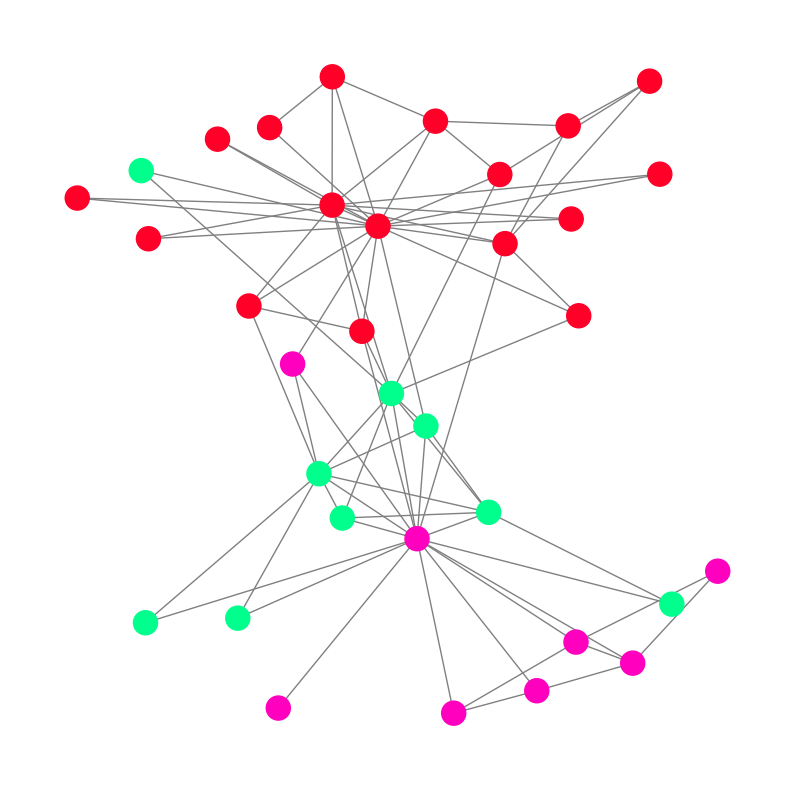

In [10]:
_ = draw_kkl(g, None, colors, cmap = 'gist_rainbow', edge_color = 'gray')